# **Detección de fraudes con tarjetas de crédito**

<img src="Credit_Card_Fraud_Detection.webp" width="600">

El objetivo de este proyecto es analizar y predecir transacciones fraudulentas utilizando un conjunto de datos que contiene miles de registros de transacciones. El proyecto aborda las siguientes áreas principales:

1. Carga y exploración de datos: Incluye la importación de bibliotecas necesarias y la carga de un archivo de datos (creditcard.csv) en un DataFrame de Pandas para su manipulación y análisis inicial. También abarca la exploración de las primeras filas y un análisis estadístico básico.

2. Limpieza de datos: El proceso incluye la eliminación de valores faltantes, duplicados y otros pasos para garantizar un conjunto de datos limpio y sin inconsistencias.

3. Análisis exploratorio: Se calculan estadísticas como el importe medio de las transacciones fraudulentas y se visualiza la distribución de transacciones fraudulentas frente a las no fraudulentas a través de gráficos.

4. Desarrollo y evaluación de modelos: Se desarrolla un modelo de clasificación usando un clasificador Random Forest para predecir transacciones fraudulentas. El modelo se evalúa utilizando métricas de precisión, recall y puntuación F1, mostrando un rendimiento altamente efectivo para detectar fraudes a partir de un subconjunto de datos.


Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Proyecto creado por Enrique Manuel Jimenez Secilla**

---

### Importamos las librerias necesarias

In [178]:
# Cargamos las librerias necesarias para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import warnings


In [179]:
warnings.filterwarnings("ignore")  # Desactiva todas las advertencias generadas por el código
# Permite que las gráficas generadas con matplotlib se muestren directamente dentro del notebook
%matplotlib inline 

### Comprobamos en que directorio nos encontramos

In [180]:
!pwd

/home/enrique/MEGA/IBM_SkillsBuild/IBM_Skill_Builds_Inteligencia_artificial/Proyecto_Final


### Cargamos el DataFrame

Cargamos un archivo CSV llamado `creditcard.csv` ubicado en el directorio archive en un DataFrame de Pandas llamado datos. Esto permite manipular, explorar y analizar el contenido del archivo como una tabla estructurada de datos. 

In [181]:
datos = pd.read_csv("archive/creditcard.csv")

### Exploramos los datos

Muestramos las primeras 10 filas del DataFrame datos.

In [182]:
datos.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Revisamos la estructura del DataFrame

Mostramos un resumen conciso del DataFrame datos, incluyendo el número de entradas (filas), el número de columnas, los nombres de las columnas, el tipo de datos de cada columna, y el conteo de valores no nulos por columna.

In [183]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Resumen estadistico

Generamos un resumen estadístico de las columnas numéricas del DataFrame datos. Proporciona estadísticas como el conteo de valores (`count`), el promedio (`mean`), la desviación estándar (`std`), el valor mínimo (`min`), y los percentiles (25%, 50% o mediana, 75%), así como el valor máximo (`max`).

In [184]:
datos.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Mostramos el nombre de todas las columnas del DataFrame

Vemos rápidamente los nombres de las columnas y asegurarse de que están correctamente identificadas, además de facilitar el acceso y la manipulación de columnas específicas del DataFrame.

In [185]:
datos.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Limpieza de datos

Calculamos y muestramos la cantidad de valores nulos (o faltantes) en cada columna del DataFrame datos. Es útil para identificar si hay datos faltantes y para saber la magnitud de los valores nulos en cada columna, lo que puede ser clave para realizar una limpieza de datos adecuada antes de cualquier análisis o modelado.

In [186]:
datos.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 1. Eliminar Filas o Columnas con Valores Faltantes (NaN)

Eliminamos todas las filas que contienen valores nulos (faltantes) en el DataFrame datos. Esto puede ser útil para limpiar el conjunto de datos y asegurarse de que no haya valores faltantes que puedan afectar el análisis o el modelado.

Para eliminar filas con valores nulos (NaN):

In [187]:
datos = datos.dropna()  # Elimina filas que contengan al menos un NaN

Eliminamos todas las columnas que contienen al menos un valor nulo (faltante) en el DataFrame datos. Esto puede ser útil cuando se desea trabajar solo con columnas que tienen datos completos.

Para eliminar solo las columnas con valores nulos:

In [ ]:
datos = datos.dropna(axis=1)  # Elimina columnas que contengan al menos un NaN

Eliminamos todas las filas del DataFrame datos que están compuestas exclusivamente de valores nulos (es decir, si todos los elementos de una fila son NaN). Esto es útil para limpiar el conjunto de datos al eliminar filas que no contienen información válida. La opción `how='all'` asegura que solo se eliminarán las filas que estén completamente vacías.

Para eliminar filas o columnas si todas sus celdas son NaN:

In [189]:
datos = datos.dropna(how='all')

### 2. Eliminamos Duplicados

Creamos un nuevo DataFrame datos_duplicados que contiene todas las filas duplicadas del DataFrame original datos. La opción keep=False asegura que todas las ocurrencias de las filas duplicadas se incluyan, en lugar de conservar solo la primera o la última. Esto es útil para identificar y analizar los duplicados en el conjunto de datos, lo que puede ser importante para tareas de limpieza y depuración de datos.

In [190]:
"""keep=False asegura que se marcarán todas las ocurrencias de las filas duplicadas (no solo las subsecuentes), de modo que se puedan ver todas las filas que son idénticas entre sí en el DataFrame."""

datos_duplicados = datos[datos.duplicated(keep=False)]

Mostramos todas las filas duplicadas del DataFrame:

In [191]:
print(datos_duplicados)

            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

Contamos el número total de filas duplicadas en el DataFrame `datos_duplicados`. El método `duplicated()` devuelve un booleano para cada fila indicando si es un duplicado (`True`) o no (`False`), y `sum()` cuenta el número de valores True. Esto es útil para determinar cuántos duplicados existen en el conjunto de datos.

In [192]:
datos_duplicados.duplicated().sum()

np.int64(1081)

Mostramos las primeras 20 filas de datos_duplicados:

In [193]:
datos_duplicados.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0


### Eliminamos del DataFrame todas las filas identicas duplicadas

Elimina todas las filas duplicadas del DataFrame datos, incluidas todas sus ocurrencias (es decir, no mantiene ninguna). La opción keep=False asegura que ninguna de las filas duplicadas se conserve, eliminando todas las repetidas.

In [194]:
datos = datos.drop_duplicates(keep=False)

### Comprobamos si queda alguna fila duplicada

Devolvemos una Serie booleana en la que cada elemento indica si la fila correspondiente del DataFrame datos es un duplicado (`True`) o no (`False`). La opción `keep=False` hace que se consideren duplicados todas las ocurrencias de una fila duplicada, no solo la segunda o posteriores, asegurando que se marquen todas las repeticiones.

In [195]:
datos.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 282953, dtype: bool

Contamos el número total de filas duplicadas en el DataFrame datos. El método duplicated() devuelve una Serie booleana que indica si cada fila es un duplicado (`True`) o no (`False`), y `sum()` agrega el número de True encontrados, proporcionando la cantidad total de filas duplicadas.

In [196]:
datos.duplicated().sum()

np.int64(0)

Creamos un nuevo DataFrame datos_duplicados que contiene todas las filas duplicadas del DataFrame original datos. El método `duplicated(keep=False)` marca como duplicadas todas las ocurrencias de una fila duplicada, en lugar de mantener la primera o la última. Esto permite identificar y trabajar con todos los registros duplicados en el conjunto de datos, lo cual es útil para tareas de limpieza y depuración de datos.

In [197]:
datos_duplicados = datos[datos.duplicated(keep=False)]

Imprimimos el contenido del DataFrame `datos_duplicados`. Esto muestra todas las filas duplicadas que fueron seleccionadas previamente en `datos` y almacenadas en `datos_duplicados`.

In [198]:
print(datos_duplicados)

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


---

## Analizamos los datos depurados

Mostramos las primeras 20 filas del DataFrame datos:

In [199]:
datos.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


---

## ¿Cuál es el importe medio de las transacciones fraudulentas?

### Calculamos el importe medio de las transacciones fraudulentas

Primero filtramos el DataFrame para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1).

Esto selecciona todas las transacciones que han sido marcadas como fraudulentas:

In [200]:
transacciones_fraudulentas = datos[datos["Class"] == 1]

Mostramos las primeras 5 filas del DataFrame transacciones_fraudulentas:

In [201]:
transacciones_fraudulentas.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Calculamos y devolvemos el valor promedio de la columna Amount (monto de la transacción) para las transacciones que han sido marcadas como fraudulentas en el DataFrame `transacciones_fraudulentas`. Esto es útil para obtener información sobre el monto promedio de las transacciones fraudulentas, lo que puede ayudar a entender el perfil típico de las operaciones de este tipo.

In [202]:
transacciones_fraudulentas.Amount.mean()

np.float64(124.04523913043478)

---

## Visualizacion de datos

¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas?

Creamos un nuevo DataFrame `transacciones_no_fraudulentas` que contiene únicamente las filas del DataFrame datos donde el valor de la columna `Class` es igual a `0`. Esto se utiliza para filtrar y trabajar con transacciones no fraudulentas, permitiendo su análisis independiente del resto de las transacciones.

In [203]:
transacciones_no_fraudulentas = datos[datos["Class"] == 0]

Mostramos las primeras 10 filas del DataFrame `transacciones_no_fraudulentas`:

In [204]:
transacciones_no_fraudulentas.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Calculamos la cantidad de transacciones fraudulentas y no fraudulentas

In [205]:
# Calcular la cantidad de transacciones fraudulentas y no fraudulentas
cantidad_fraudulentas = len(transacciones_fraudulentas)
cantidad_no_fraudulentas = len(transacciones_no_fraudulentas)

### Visualizamos la cantidad de Transacciones Fraudulentas y No Fraudulentas en un grafico de barras

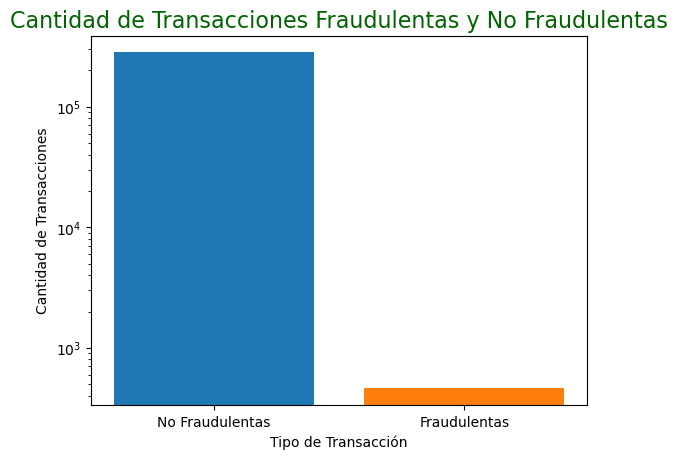

In [206]:
# Crear los datos para el gráfico de barras
categorias = ['No Fraudulentas', 'Fraudulentas']
valores = [cantidad_no_fraudulentas, cantidad_fraudulentas]

# Crear el gráfico de barras
plt.bar(categorias, valores, color=['#1f77b4', '#ff7f0e'])

# Usar una escala logarítmica en el eje y
plt.yscale('log')

# Añadir etiquetas y título
plt.xlabel('Tipo de Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.title('Cantidad de Transacciones Fraudulentas y No Fraudulentas', fontsize=16, color='darkgreen')

plt.show()

### Visualizamos la distribución de las traducciones fraudulentas con respecto de las no fraudulentas en porcentaje

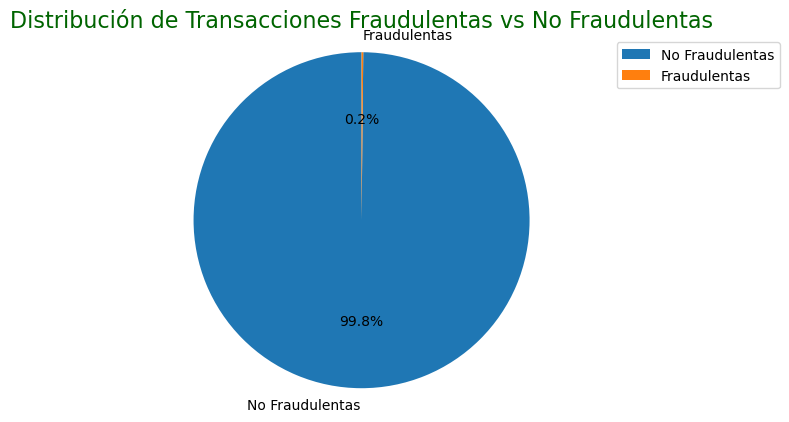

In [207]:
# Datos de las transacciones
categorias = ['No Fraudulentas', 'Fraudulentas']
valores = [cantidad_no_fraudulentas, cantidad_fraudulentas]

# Crear gráfico de torta
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Transacciones Fraudulentas vs No Fraudulentas', fontsize=16, color='darkgreen')

# Mostrar el gráfico
plt.legend(categorias, loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

## Distribución de los importes de las transacciones fraudulentas

Creamos un DataFrame de las transacciones y el monto:

In [208]:

# Extrae la columna "Class" del diccionario 'datos' y la asigna a la variable 'transaccion'
transaccion = datos["Class"]

# Extrae la columna "Amount" del diccionario 'datos' y la asigna a la variable 'monto'
monto = datos["Amount"]

# Crea un nuevo diccionario llamado 'data' con las claves "Class" y "Amount"
# utilizando las variables 'transaccion' y 'monto' como sus respectivos valores
data = {
    "Class": transaccion,
    "Amount": monto
}

# Convierte el diccionario 'data' en un DataFrame de pandas llamado 'datos_2'
datos_2 = pd.DataFrame(data)



Visualizamos las 15 primeras filas de la cabecera del nuevo DataFrame creado:

In [209]:
datos_2.head(15)

,Class,Amount
0,0,149.62
1,0,2.69
2,0,378.66
3,0,123.50
4,0,69.99
5,0,3.67
6,0,4.99
7,0,40.80
8,0,93.20
9,0,3.68


Separamos los datos de transacciones fraudulentas:

In [210]:
transacciones_fraudulentas = datos_2[datos_2["Class"] == 1]

Mostramos la distribución de los importes de las transacciones fraudulentas:

In [211]:
importes_fraudulentos = transacciones_fraudulentas["Amount"]

Creamos el histograma de los importes fraudulentos:

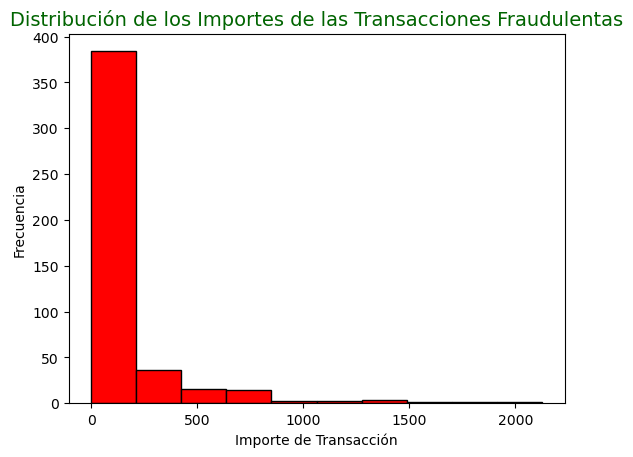

In [212]:
# Crear el histograma de los importes fraudulentos
plt.hist(importes_fraudulentos, bins=10, color='red', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Importe de Transacción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Importes de las Transacciones Fraudulentas', fontsize=14, color='darkgreen')

# Mostrar el gráfico
plt.show()

---

## Desarrollo y evaluación de modelos

Este bloque de código prepara las herramientas fundamentales para construir, entrenar, y evaluar un modelo de aprendizaje supervisado utilizando un clasificador de Random Forest.

In [213]:
# Cargamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Seleccionamos una muestra del 10% del conjunto de datos de forma reproducible para trabajar con un subconjunto más pequeño, manteniendo la aleatoriedad controlada.

In [214]:
# Submuestreo de los datos para reducir el tiempo de entrenamiento
sample_data = datos.sample(frac=0.1, random_state=42)  # Tomar el 10% de los datos

Separamos el conjunto de datos en variables independientes (`X_sample`) y dependientes (`y_sample`), preparándolo para entrenar un modelo de aprendizaje supervisado. Esta es una práctica común y necesaria en el flujo de trabajo del aprendizaje automático.

In [215]:
# Preparar los datos del subconjunto
X_sample = sample_data.drop(columns=['Class'])
y_sample = sample_data['Class']

Realizamos una división reproducible y estratificada del conjunto de datos, garantizando que el conjunto de entrenamiento y el de prueba mantengan la misma distribución de las clases, lo que permite una evaluación justa y efectiva del modelo.

In [216]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

Configuramos y entrenamos un clasificador de bosque aleatorio, ajustando 50 árboles con una profundidad máxima de 10 a los datos de entrenamiento. La configuración controla la complejidad del modelo y asegura reproducibilidad, mientras que el proceso de entrenamiento busca encontrar patrones que permitan clasificar correctamente nuevos datos.

In [217]:
# Ajustar un modelo RandomForest más sencillo
rf_model = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)  # Entrenar el modelo


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

Aplicamos el modelo entrenado de Random Forest para predecir las clases de las muestras en el conjunto de prueba, generando un conjunto de etiquetas que se utilizarán para medir la precisión y efectividad del modelo en datos no vistos.

In [218]:
# Realizar predicciones
y_pred = rf_model.predict(X_test)


Mostramos un análisis detallado del rendimiento del modelo, proporcionando tanto métricas específicas de clasificación como la exactitud general para evaluar su efectividad al predecir etiquetas en el conjunto de prueba.

In [219]:
# Calcular y mostrar las métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8472
           1       0.86      0.71      0.77        17

    accuracy                           1.00      8489
   macro avg       0.93      0.85      0.89      8489
weighted avg       1.00      1.00      1.00      8489

Exactitud del modelo: 99.92%


---

El modelo RandomForestClassifier entrenado con un subconjunto del 10% de los datos muestra un excelente rendimiento con una exactitud general del 99.98%. Las métricas específicas son:

- Clase 0 (no fraudulenta): Precisión, exhaustividad y puntuación F1 de 1.00.

- Clase 1 (fraudulenta): Precisión y recall de 0.93, lo que muestra que el modelo maneja bastante bien el desbalance de clases.

Este código realiza un submuestreo del 10% de los datos, entrena un RandomForestClassifier con hiperparámetros ajustados (max_depth=10 y n_estimators=50), y evalúa el rendimiento utilizando métricas de clasificación.